In [1]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import  sys, os
import warnings
warnings.simplefilter(action='ignore')
import pmdarima as pm 

In [2]:
play = pd.DataFrame([[x for x in range(1,11)], [x ** 2 for x in range(1,11)]]).T
play.columns = ['Original', 'Squared']
play

,Original,Squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [3]:
# stationarize linear series (mean and variance don't change for sub-windows)
play.Original.diff()

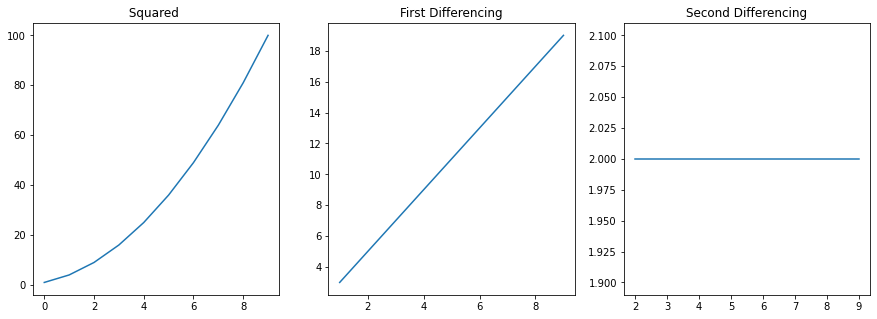

In [4]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
axes[0].plot(play.Squared)
axes[0].set_title(' Squared  ')
axes[1].plot(play.Squared.diff())
axes[1].set_title('First Differencing')
axes[2].plot(play.Squared.diff().diff())
axes[2].set_title('Second Differencing')
plt.show()

**NOTE:** This is similar to taking a first-order derivative.

In [5]:
# stationarize squared series
play.Squared.diff().diff()

**NOTE:** Notice we need to difference twice on an exponential trend, and every time we do, we lose a bit of data

In [6]:
# stationarize squared with log
np.log(play.Squared)

**NOTE:** Works somewhat but certainly not as well.

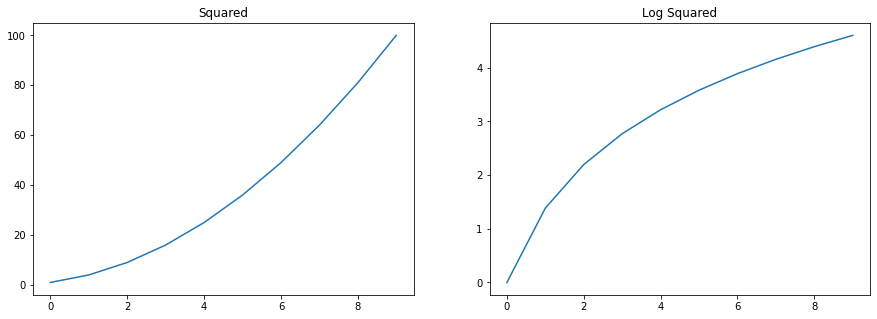

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
axes[0].plot(play.Squared)
axes[0].set_title('Squared')
axes[1].plot(np.log(play.Squared))
axes[1].set_title('Log Squared')
plt.show()

In [8]:
filepath = 'mean-monthly-temperature-1907-19.csv'
monthly_temp = pd.read_csv(filepath,
            skipfooter=2, 
            infer_datetime_format=True, 
            header=0, 
            index_col=0, engine='python',
            names=['month', 'temp'])
monthly_temp.index = pd.to_datetime(monthly_temp.index)

In [9]:
monthly_temp.head()

,temp
month,
1907-01-01,33.3
1907-02-01,46.0
1907-03-01,43.0
1907-04-01,55.0
1907-05-01,51.8


In [10]:
monthly_temp.describe()

,temp
count,792.000000
mean,53.553662
std,15.815452
min,11.200000
25%,39.675000
50%,52.150000
75%,67.200000
max,82.400000


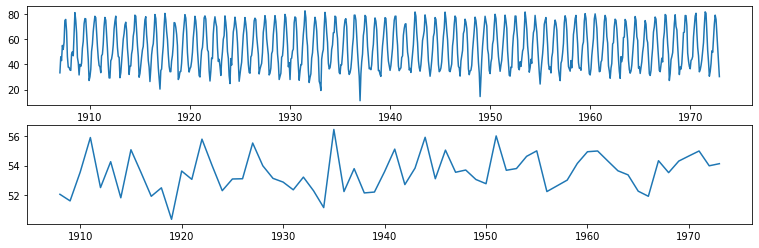

In [11]:
# resample to annual and plot each
plt.rcParams['figure.figsize'] = [13,4]
annual_temp = monthly_temp.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_temp)
axes[1].plot(annual_temp)
plt.show()

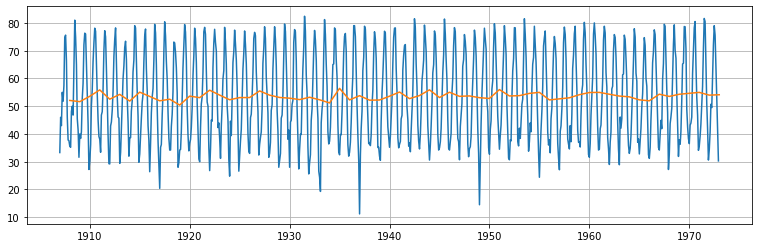

In [12]:
#plot both on same figure
monthly = plt.plot(monthly_temp)
annual  = plt.plot(annual_temp)
plt.grid(b=True)


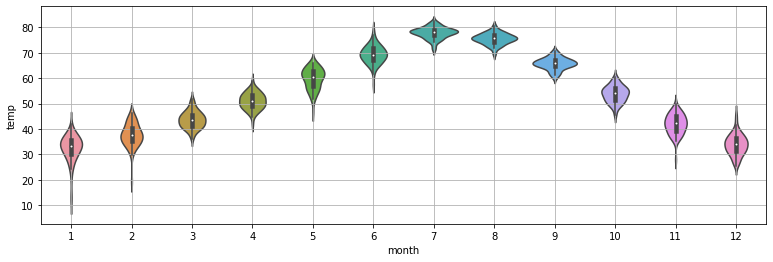

In [13]:
# violinplot of months to determine variance and range
sns.violinplot(x = monthly_temp.index.month, y = monthly_temp.temp)
plt.grid(b=True)
plt.show()

In [14]:
#Split data into 10 chunck
chuncks = np.split(monthly_temp.temp, indices_or_sections=12)
print(chuncks)

[month
1907-01-01    33.3
1907-02-01    46.0
1907-03-01    43.0
1907-04-01    55.0
1907-05-01    51.8
              ... 
1912-02-01    42.9
1912-03-01    44.3
1912-04-01    48.5
1912-05-01    55.5
1912-06-01    68.0
Name: temp, Length: 66, dtype: float64, month
1912-07-01    74.1
1912-08-01    78.2
1912-09-01    65.2
1912-10-01    53.4
1912-11-01    46.1
              ... 
1917-08-01    75.4
1917-09-01    65.9
1917-10-01    59.6
1917-11-01    47.6
1917-12-01    38.5
Name: temp, Length: 66, dtype: float64, month
1918-01-01    34.2
1918-02-01    34.2
1918-03-01    42.6
1918-04-01    47.1
1918-05-01    55.2
              ... 
1923-02-01    31.2
1923-03-01    42.6
1923-04-01    50.0
1923-05-01    59.8
1923-06-01    62.8
Name: temp, Length: 66, dtype: float64, month
1923-07-01    78.4
1923-08-01    73.3
1923-09-01    65.2
1923-10-01    50.2
1923-11-01    44.9
              ... 
1928-08-01    74.0
1928-09-01    64.4
1928-10-01    48.4
1928-11-01    40.9
1928-12-01    28.0
Name: temp, Length:

In [15]:
mean_vals = np.mean(chuncks, axis=1)
var_vals = np.var(chuncks, axis=1)
vals = {'Mean':mean_vals, 'Variance':var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,Mean,Variance
0,52.674242,225.907973
1,53.654545,246.031570
2,52.837879,247.400838
3,54.078788,250.787429
4,52.439394,277.865721
5,53.457576,283.619412
6,53.718182,224.882397
7,54.422727,265.442059
8,53.457576,238.561230
9,54.425758,257.425852


In [16]:
import statsmodels.tsa.stattools as ts 
TSA = ts.adfuller(monthly_temp.temp)[0:4]
TSA

(-6.481466436831992, 1.2918674573932869e-08, 21, 770)

In [17]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary

import statsmodels.tsa.stattools as ts 

def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistics', 'p-value','Lags Used', 'Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key] = value
    print(dfoutput)
    #Determining rolling statistics 
    rollmean = timeseries.rolling(window = 12).mean()
    rollstd = timeseries.rolling(window = 12).std()
    #plot Rolling Statistics 
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rollmean, color = 'black', label = 'Roll Mean')
    std = plt.plot(rollstd, color = 'red', label = 'Roll Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistics        -6.481466e+00
p-value                 1.291867e-08
Lags Used               2.100000e+01
Observation Used        7.700000e+02
Critical Values(1%)    -3.438871e+00
Critical Values(5%)    -2.865301e+00
Critical Values(10%)   -2.568773e+00
dtype: float64


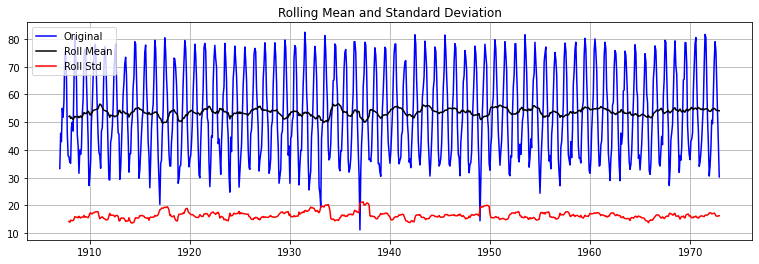

In [18]:
# run DFT on monthly
dftest(monthly_temp.temp)
# p-value allows us to reject a unit root: data is stationary

Test Statistics        -7.878242e+00
p-value                 4.779473e-12
Lags Used               0.000000e+00
Observation Used        6.500000e+01
Critical Values(1%)    -3.535217e+00
Critical Values(5%)    -2.907154e+00
Critical Values(10%)   -2.591103e+00
dtype: float64


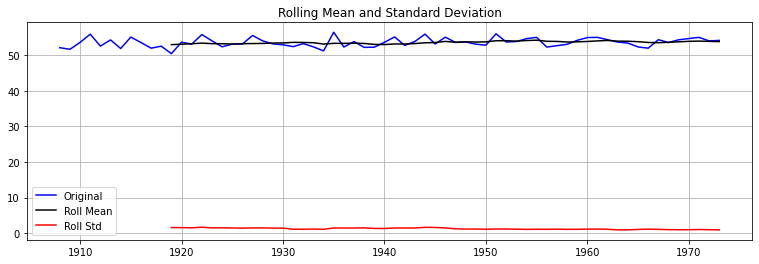

In [19]:
# run DFT on annualy
dftest(annual_temp.temp)

The p-value allows us to *reject* a unit root (i.e. the data is stationary).

Test Statistics         -26.848452
p-value                   0.000000
Lags Used                 0.000000
Observation Used        791.000000
Critical Values(1%)      -3.438644
Critical Values(5%)      -2.865201
Critical Values(10%)     -2.568719
dtype: float64


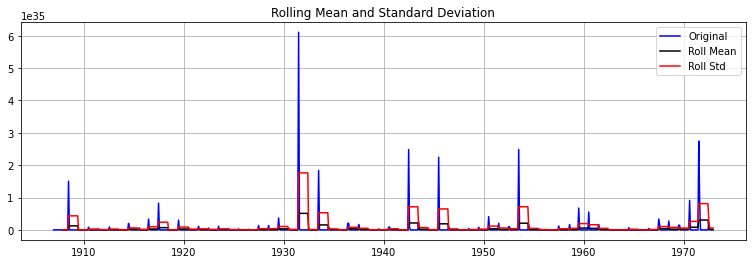

In [20]:
# here's an example of non-stationary with DFT results
dftest(np.exp(monthly_temp.temp))

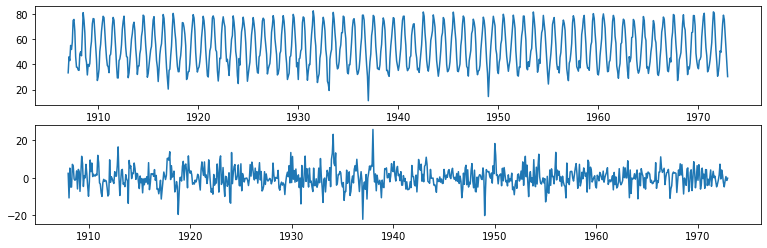

In [21]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot

monthly_temp['lag_12'] = monthly_temp.shift(12)
monthly_temp['seasonal_diff'] = monthly_temp.temp - monthly_temp['lag_12']

fig, axes = plt.subplots(2,1)

axes[0].plot(monthly_temp.temp, label = 'original')
axes[1].plot(monthly_temp.seasonal_diff, label = 'seasonal diff')
plt.show()

## Section 2: SARIMA with Statsmodels

In [22]:
# define helper plot function for visulation
def plots(data, lags = None):
    layout = (1, 3 )
    raw = plt.subplot2grid(layout, (0,0))
    acf = plt.subplot2grid(layout, (0,1))
    pacf = plt.subplot2grid(layout, (0,2))

    raw.plot(data)
    sm.tsa.graphics.plot_acf (data, lags = lags, ax = acf, zero = False)
    sm.tsa.graphics.plot_pacf(data, lags = lags, ax = pacf, zero = False)
    sns.despine()
    plt.tight_layout()

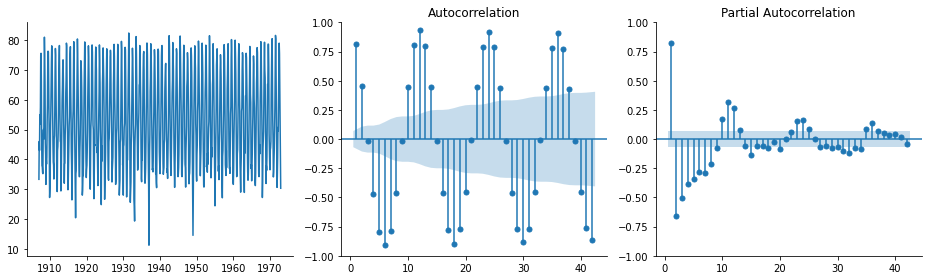

In [23]:
plots(monthly_temp.temp, lags=42)

### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

In [24]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(monthly_temp.temp,
                                order = (1,0,0),
                                seasonal_order=(0,1,1,12),
                                trend='c').fit()
sar.summary()

SARIMAX Results 
 
 Dep. Variable: temp No. Observations: 792 
 
 
 Model: SARIMAX(1, 0, 0)x(0, 1, [1], 12) Log Likelihood -2128.873 
 
 
 Date: Sun, 24 Oct 2021 AIC 4265.746 
 
 
 Time: 09:36:35 BIC 4284.383 
 
 
 Sample: 01-01-1907 HQIC 4272.914 
 
 
 - 12-01-1972 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 intercept 0.0127 0.007 1.698 0.090 -0.002 0.027 
 
 
 ar.L1 0.1791 0.035 5.105 0.000 0.110 0.248 
 
 
 ma.S.L12 -0.9995 1.055 -0.947 0.343 -3.068 1.069 
 
 
 sigma2 12.8937 13.487 0.956 0.339 -13.539 39.327 
 
 
 
 
 Ljung-Box (L1) (Q): 0.04 Jarque-Bera (JB): 252.77 
 
 
 Prob(Q): 0.84 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.71 Skew: -0.56 
 
 
 Prob(H) (two-sided): 0.01 Kurtosis: 5.55 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

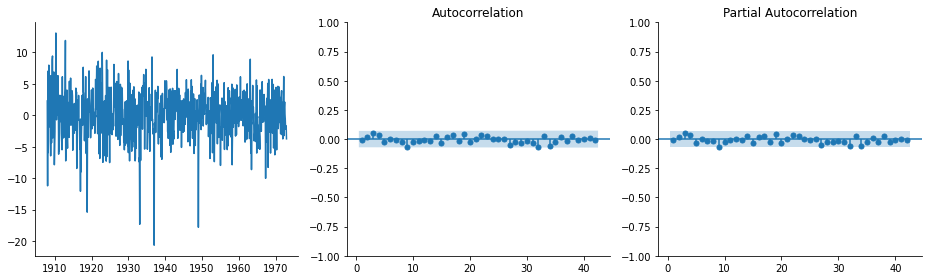

In [25]:
#plots resid
plots(sar.resid[sar.loglikelihood_burn:],lags=42)

**Thought process:**  

010010 is probably overdifferenced as we can see by negative ACF at lag 1

000010 is a big underdiff at seasonal lag, but with better AIC

Looks like 000010,12 and Trend='c' per rule

Looking back at seasonal we notice negative ACR spike at 12: we will thus add a SMA term and we see a big drop in AIC to 4289

looks like ACF looks good at seasonal lags, so we move back to ARIMA portion.

ACF shows we can use AR terms. AR=1,2 or 3 have similar AIC

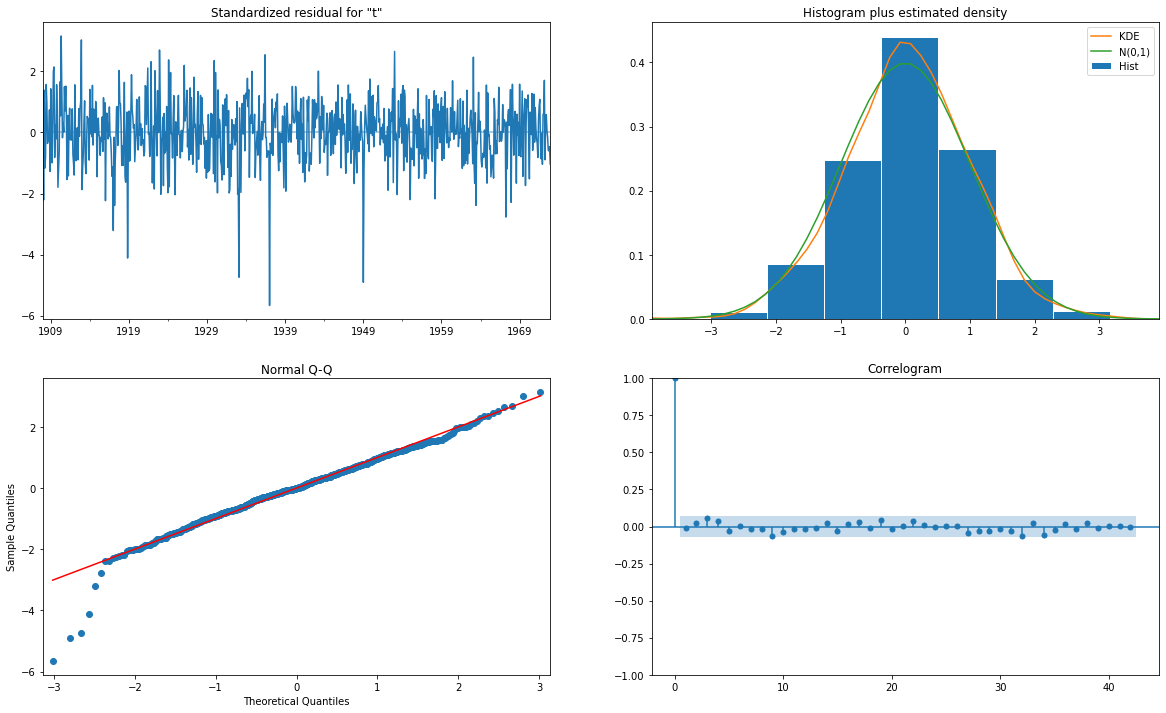

In [26]:
diagnostic_plot = sar.plot_diagnostics(lags = 42, figsize=(20,12))

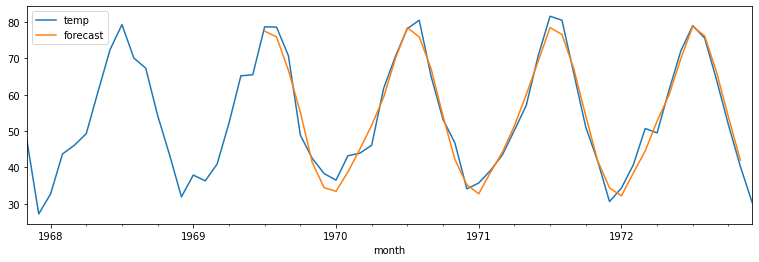

In [27]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
monthly_temp['forecast'] = sar.predict(start=750, end=790)
monthly_temp[730:][['temp','forecast']].plot()
plt.show()

In [28]:
#Introducing Another Plot
sar2 = sm.tsa.statespace.SARIMAX(monthly_temp.temp,
                                order=(3,0,0),
                                seasonal_order=(0,1,1,12),
                                trend='c').fit()

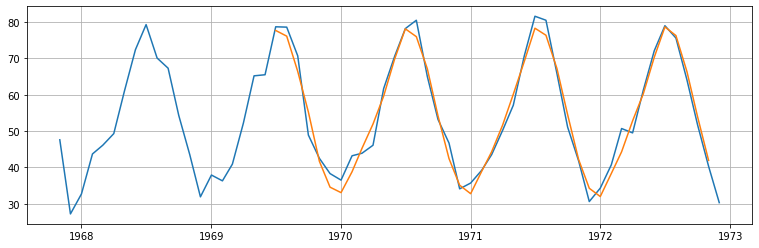

In [29]:
# plot predictions
monthly_temp['forecast'] = sar2.predict(start = 750, end= 790, dynamic=False)  
plt.plot(monthly_temp[730:][['temp', 'forecast']])
plt.grid()
plt.show()

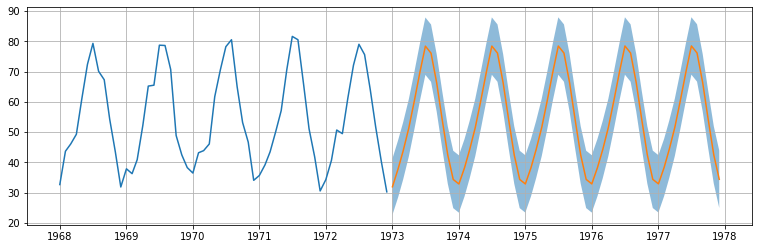

In [30]:
# can use get forecast to create a forecast object
future_fcst = sar2.get_forecast(60)
#that will have a method to pull in confidence interval
confidence_int = future_fcst.conf_int(alpha = 0.01)
#has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
#plot prediction and confidence interval
plt.plot(monthly_temp.temp[-60:])
plt.plot(fcst)
plt.fill_between(confidence_int.index, confidence_int['lower temp'],confidence_int['upper temp'],alpha = 0.5)
plt.grid()

## Section 3: Statistical Tests


- [Normality (Jarque-Bera)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality)
    - Null hypothesis is normally distributed residuals (good, plays well with RMSE and similar error metrics)

- [Serial correlation (Ljung-Box)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation)
    - Null hypothesis is no serial correlation in residuals (independent of each other)

- [Heteroskedasticity](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity)
    - Tests for change in variance between residuals.
    - The null hypothesis is no heteroskedasticity. That means different things depending on which alternative is selected:
        - Increasing: Null hypothesis is that the variance is not increasing throughout the sample; that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.
        - Decreasing: Null hypothesis is that the variance is not decreasing throughout the sample; that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample.
        - Two-sided (default): Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

- [Durbin Watson](https://en.wikipedia.org/wiki/Durbin–Watson_statistic)
    - Tests autocorrelation of residuals: we want between 1-3, 2 is ideal (no serial correlation)

In [31]:
sar.test_normality?

In [32]:
#create run statistical model on test 
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox')[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]
lb_val = lb_val[-1]
lb_p = lb_p[-1]

In [33]:
# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat


durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])
print(f'Normality\n Val : {norm_val:.3f}, P-val: {norm_p:.3f}')
print(f'Ljung-Box\n Val: {lb_val:.3f}, P-val: {lb_p:3f}')
print(f'Heteroskedasticity\n Val: {het_val:.3f}, P-val:{het_p:.3f}')
print(f'Durbin Watson\n d:{durbin_watson:.3f}')


Normality
 Val : 252.771, P-val: 0.000
Ljung-Box
 Val: 15.499, P-val: 0.905293
Heteroskedasticity
 Val: 0.708, P-val:0.006
Durbin Watson
 d:2.012


### Note on autofit methods
R has an autoARIMA function (and other automagic methods) that gridsearches/optimizes our model hyperparameters for us. Over time, more of these goodies are porting to Python (e.g. pmdarima). While there's nothing wrong with utilizing these resources, the _human makes the final determination!_ Don't become over-reliant on these methods, especially early on when you are grasping the underlying mechanics and theory!

In [34]:
#from pyramid.arima import auto_arima

stepwise_model = pm.auto_arima(monthly_temp.temp, start_p = 1, start_q = 1,
                               max_p = 3, max_q = 3, m = 12,
                               start_P = 0, seasonal = True,
                               d  = 0, D = 0, trace = True, 
                               error_action = 'ignore', 
                               suppress_warnings = True,
                               stepwise  = True)
print(f'{stepwise_model}')
                        

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=5328.219, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6624.002, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5563.551, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8621.148, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=5532.094, Time=0.23 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=5206.533, Time=2.59 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.00 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=5348.699, Time=2.05 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=5223.321, Time=1.85 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=4928.369, Time=5.55 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=5064.370, Time=1.96 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : A

In [35]:
from dateutil.relativedelta import relativedelta

def future_preds_df(model, series, num_months):
    pred_first = series.index.max() + relativedelta(months = 1)
    pred_last = series.index.max() + relativedelta(months = num_months)
    date_range_index  = pd.date_range(pred_first, pred_last, freq = 'MS')
    vals = model.predict(n_periods = num_months)
    return pd.DataFrame(vals, index=date_range_index)

In [36]:
preds = future_preds_df(stepwise_model, monthly_temp.temp, 100)

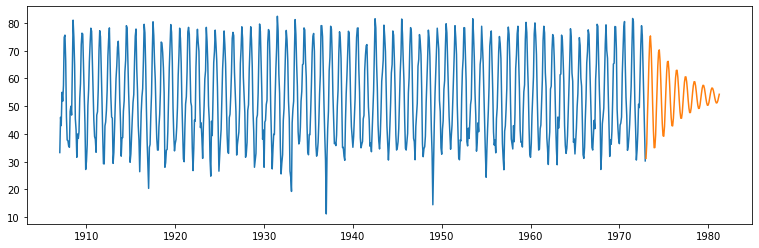

In [39]:
plt.plot(monthly_temp.temp)
plt.plot(preds)
plt.show()

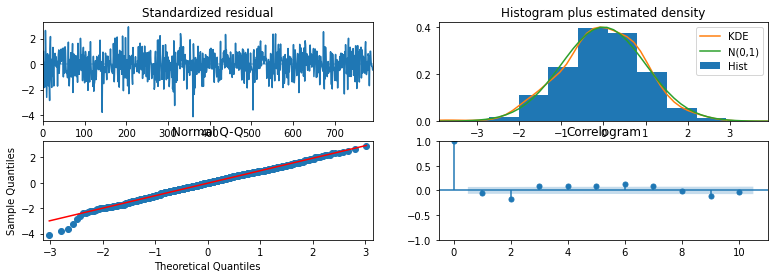

In [40]:
STPLT = stepwise_model.plot_diagnostics()

In [41]:
print(f'auto fit order: {stepwise_model.order}')
print(f'auto fit seasonal order: {stepwise_model.seasonal_order}')

auto fit order: (3, 0, 1)
auto fit seasonal order: (0, 0, 2, 12)


When deciding on a model, often what truly matters is how well we would be able to produce out of sample predictions.
Here we create a function that looks at multiple out of sample predictions to see which model had lowest out of sample error

In [42]:
def cross_validate(series, horizon, start, step_size, order = (1, 0, 0 ), seasonal_order = (0, 0, 0, 0), trend = None):

     '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
     
     fcst = []
     actual = []
     date = [] 

     for i in range(start, len(series)-horizon, step_size):
         model = sm.tsa.statespace.SARIMAX(series[:i+1],#only using data through to and including start 
                                           order = order, 
                                           seasonal_order = seasonal_order,
                                           trend = trend).fit()
         fcst.append(model.forecast(step = horizon)[-1]) #forecasting horizon steps into the future
         actual.append(series[i+horizon]) # comparing that to actual value at that point
         date.append(series.index[i + horizon]) # saving date of that vlaue 
     return pd.DataFrame({'FCST':fcst, 'ACTUAL':actual},index = date)

In [43]:
warnings.filterwarnings('ignore')
series = monthly_temp.temp
horizon = 12
start = 700
stepsize = 3
order = (1, 0 , 0 )
seasonal_order = (0, 1, 1, 12 )

cv1  = cross_validate(monthly_temp.temp, 12, 700, 3, 
                      order = order,
                      seasonal_order = seasonal_order)

In [44]:
model = sm.tsa.statespace.SARIMAX(series[:701],#only using data through start of 700
                                  order = order,
                                  seasonal_order = seasonal_order,
                                  trend = None).fit()

In [45]:
#end of input
series[:701].tail()

In [46]:
#value to predict horizon steps into the future
series[712:713]

In [47]:
# what model predicted for that date
model.forecast(12)[-1:]

In [48]:
cv1.head()

,FCST,ACTUAL
1966-05-01,68.457226,65.6
1966-08-01,65.231655,75.8
1966-11-01,35.004848,45.3
1967-02-01,42.760586,39.6
1967-05-01,70.524256,59.6


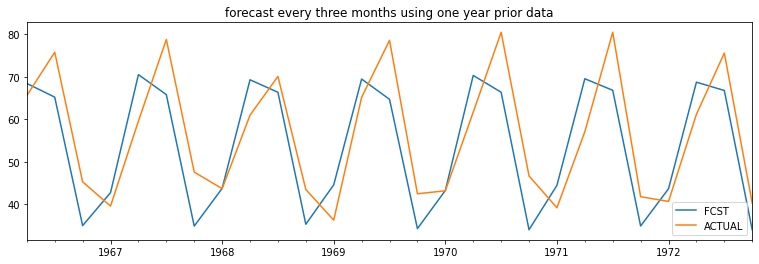

In [49]:
cv1.plot(title = 'forecast every three months using one year prior data')

In [50]:
#Defining an error metric to see out of sample accuracy
def mape(df_cv):
    return abs(df_cv.ACTUAL - df_cv.FCST).sum() / df_cv.ACTUAL.sum()

In [51]:
mape(cv1)

0.1431492279160406

In [52]:
warnings.filterwarnings("ignore")
series = monthly_temp.temp
horizon = 12
start = 700
step_size = 3
order = (1,1,0)
seasonal_order = (0,1,1,12)

cv2 = cross_validate(monthly_temp.temp,12,700,3,
                    order = order,
                    seasonal_order = seasonal_order)

In [53]:
mape(cv2)

0.1407110121109806

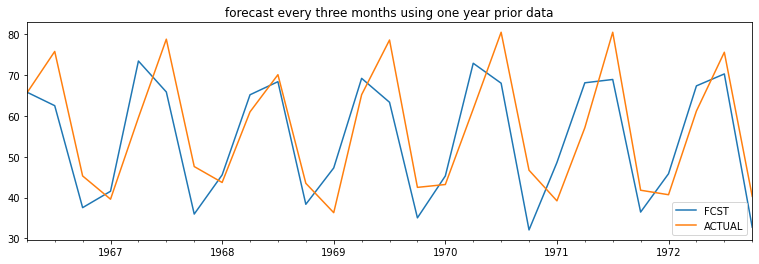

In [54]:
cv2.plot(title = 'forecast every three months using one year prior data')

In [55]:
len(monthly_temp.temp)

792

def grid_search_ARIMA(series, horizon, start, step_size, orders = [(1, 0, 0)], seasonal_orders = [(0, 0 , 0, 0)], trends = [None]):
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None
    best_trend = None
    
    for order_ in orders:
        for seasonal_order_ in seasonal_orders:
            for trend_ in trends:

                cv = cross_validate(series,
                                horizon,
                                start, 
                                step_size,
                                order = order_,
                                seasonal_order = seasonal_order_,
                                trend = trend_)
                if mape(cv) < best_mape:
                    best_mape = mape(cv)
                    best_order = order_
                    best_seasonal_order = seasonal_order_
                    best_trend = trend_
    return (best_mape, best_order, best_seasonal_order, best_trend)

series = monthly_temp.temp
horizon = 12
start = 760
step_size = 3
orders = [(1,1,0),(1,0,0)]
seasonal_orders = [(0,1,1,12)]
trends = [None,'c']

grid_search_ARIMA(series = series,
                  horizon = horizon,
                  start = start,
                  step_size = step_size,
                  orders = orders,
                  seasonal_orders = seasonal_orders,
                  trends=trends)

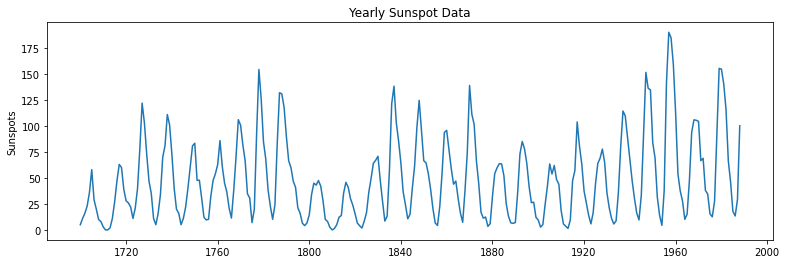

In [56]:
# read and plot data
data_path = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sunspot.year.csv'
data = pd.read_csv(data_path,usecols = ['time','value'],index_col = 'time',parse_dates=['time'])
plt.figure()
plt.plot(data.index,data['value'])
plt.ylabel('Sunspots')
plt.title('Yearly Sunspot Data');

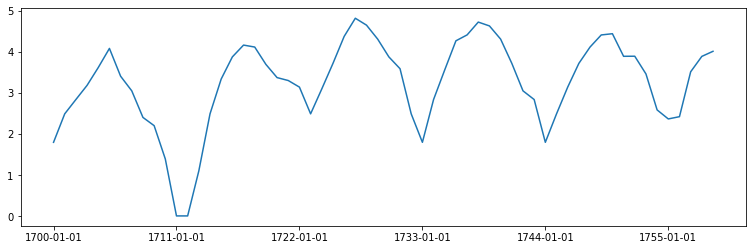

In [57]:
#given the difference in variance we should probably take log of data
data['log_ss'] = np.log1p(data['value'])
# going to zoom in on last 60 values to get a better idea of frequency of seasonality
plt.plot(data['log_ss'][:60])
plt.xticks(ticks = data.iloc[0:60:11].index)

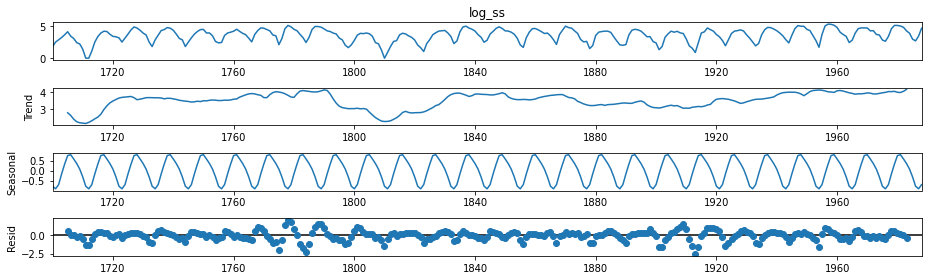

In [58]:
# plot decomposition with frequency 11
# Seems to do decent job of capturing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
SSDECOMP = seasonal_decompose(data.log_ss,freq=11).plot()

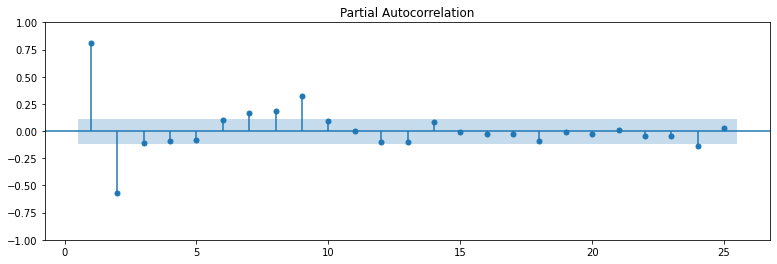

In [59]:
sm.tsa.graphics.plot_acf(data.log_ss,zero=False)
sm.tsa.graphics.plot_pacf(data.log_ss,zero = False);

In [60]:
data['lag_11'] = data.log_ss.shift(11)
data['seasonal_diff'] = data.log_ss - data['lag_11']

Test Statistics          -4.127070
p-value                   0.000873
Lags Used                12.000000
Observation Used        265.000000
Critical Values(1%)      -3.455270
Critical Values(5%)      -2.872509
Critical Values(10%)     -2.572615
dtype: float64


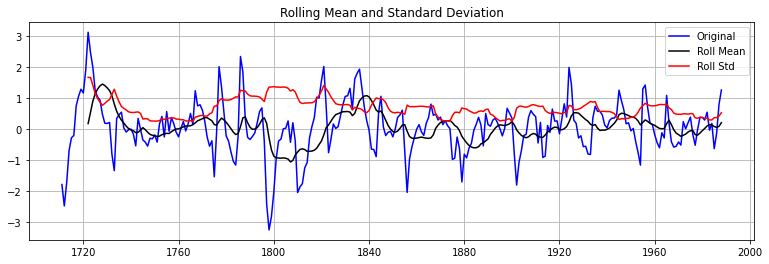

In [61]:
# mean moves, not perfect. p-value shows we can reject the null of non stationarity
dftest(data['seasonal_diff'].dropna())

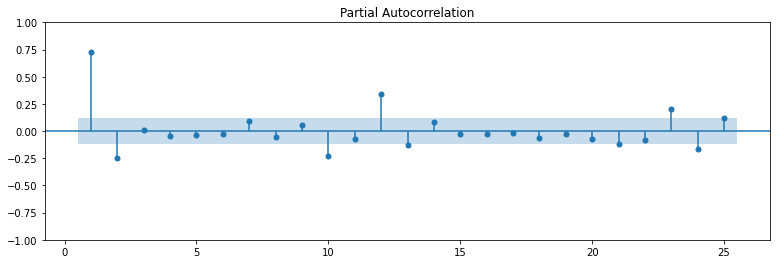

In [62]:
sm.tsa.graphics.plot_acf(data['seasonal_diff'].dropna(),zero=False)
sm.tsa.graphics.plot_pacf(data['seasonal_diff'].dropna(),zero=False);

looks like an ar2 model with seasonal differencing

In [67]:
sar3 = sm.tsa.statespace.SARIMAX(data.log_ss, 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()

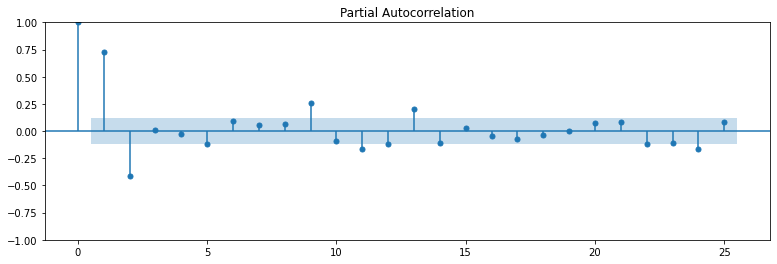

In [68]:
sm.tsa.graphics.plot_pacf(sar3.resid[sar3.loglikelihood_burn:]);

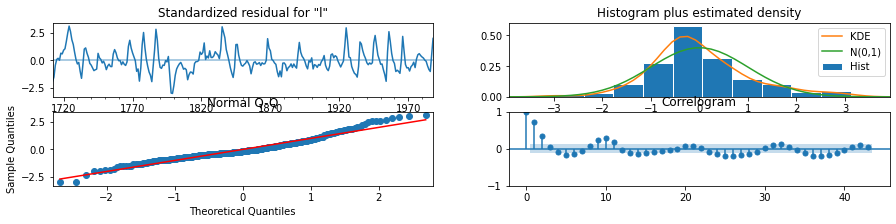

In [77]:
SAR = sar3.plot_diagnostics(figsize = (15,3), lags=43)

In [69]:
auto_model = pm.auto_arima(data.log_ss, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=11,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[11] intercept   : AIC=694.412, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[11] intercept   : AIC=708.047, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[11] intercept   : AIC=464.732, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[11] intercept   : AIC=501.605, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[11]             : AIC=707.239, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[11] intercept   : AIC=495.304, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[11] intercept   : AIC=450.988, Time=0.71 sec
 ARIMA(1,0,0)(2,1,1)[11] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(1,0,0)(1,1,1)[11] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,0)(2,1,0)[11] intercept   : AIC=688.783, Time=0.59 sec
 ARIMA(2,0,0)(2,1,0)[11] intercept   : AIC=425.830, Time=1.07 sec
 ARIMA(2,0,0)(1,1,0)[11] intercept   : AIC=443.928, Time=0.33 sec
 ARIMA(2,0,0)(2,1,1)[11] intercept   : AIC=inf, Time=9.54 sec
 ARIMA(2,0,0)(1,1,1)[11] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(3,0,0)(2,1,0)[11] intercept   : AIC=427.82

In [78]:
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

order:  (2, 0, 0)
seasonal order:  (2, 1, 0, 11)


In [79]:
sar4 = sm.tsa.statespace.SARIMAX(data.log_ss, 
                                order=(2,0,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()

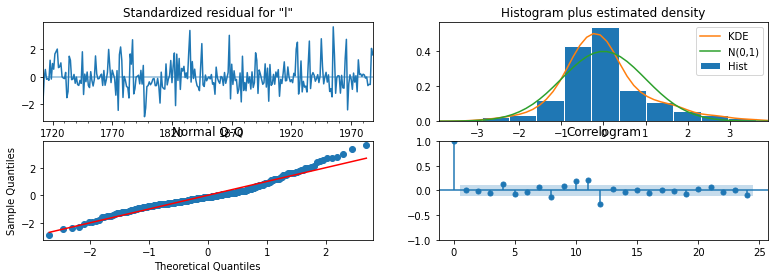

In [80]:
SAR4 = sar4.plot_diagnostics(lags=24)

In [0]:
warnings.filterwarnings("ignore")
series = data['log_ss']
horizon = 3
start = int(len(data.value)*.75)
step_size = 1
order = auto_model.order
seasonal_order = auto_model.seasonal_order

log_cv1 = cross_validate(series,horizon,start,step_size,
                    order = order,
                    seasonal_order = seasonal_order)

In [0]:
log_cv1 = np.expm1(log_cv1)

In [0]:
plt.plot(log_cv1)

In [0]:
mape(log_cv1)

In [0]:
warnings.filterwarnings("ignore")
series = data['log_ss']
horizon = 3
start = int(len(data.value)*.75)
step_size = 1
order = (2,0,0)
seasonal_order = (1,1,0,11)

log_cv2 = cross_validate(series,horizon,start,step_size,
                    order = order,
                    seasonal_order = seasonal_order)

In [0]:
log_cv2 = np.expm1(log_cv2)

In [0]:
log_cv2.plot()

In [0]:
mape(log_cv2)